In [4]:
#Fix your enviroment
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from codes.module1_mesh import *
from codes.module2_forward import *
from codes.module3_inverse import *
from codes.module4_auxiliar import *
%matplotlib inline

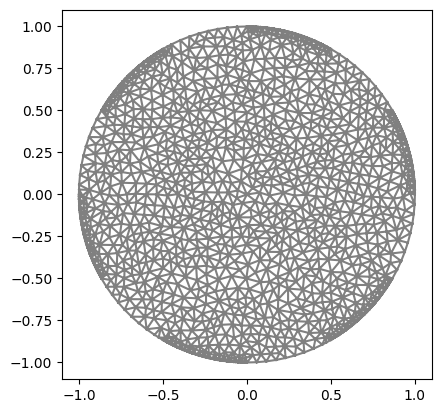

In [6]:
"Electrodes and Mesh"
ele_pos=electrodes_position(L=6, per_cober=0.5, rotate=0)
mesh_refined=MyMesh(r=1, n=20, n_in=40, n_out=8, electrodes_obj=ele_pos)
plot(mesh_refined);
plt.savefig("current/mesh.png", bbox_inches='tight', transparent=True)

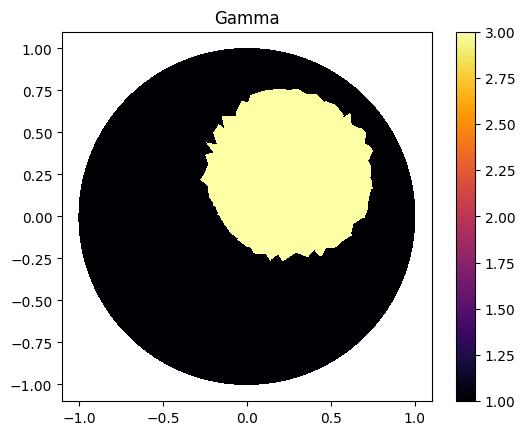

In [8]:
"Gamma function"
ValuesCells0=GammaCircle(mesh_refined,3.0,1.0,0.50, 0.25, 0.25);
Q = FunctionSpace(mesh_refined, "DG", 0) #Define Function space with basis Descontinuous Galerkin
gamma0 = Function(Q)
gamma0.vector()[:]=ValuesCells0

"Plot"
gamma_direct=plot_figure(gamma0, name="Gamma");
plt.savefig("createfunc/gamma0.png", bbox_inches='tight', transparent=True)

In [10]:
"Forward Problem"
VD=FiniteElement('CG',mesh_refined.ufl_cell(),1) #Lagrange pol. degree 1
L=ele_pos.L
l=int(L/2)                                        #Measurements number.
z=np.ones(L)*0.025                              #Impedance

#Solver
ForwardObject=ForwardProblem(mesh_refined, z)

### Method 1

In [12]:
I_all=current_method(L,l, method=1)           
list_u0, list_U0 = ForwardObject.solve_forward(VD,  I_all, gamma0)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [13]:
print(np.array(I_all))

[[ 1.  0.  0. -1.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0. -1.]]


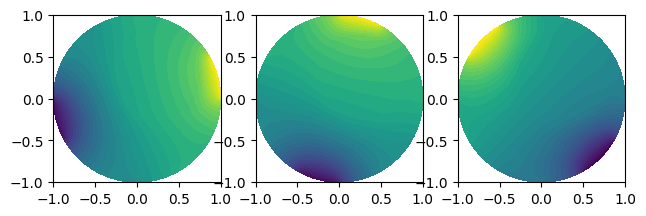

In [14]:
plt.figure(figsize=(10, 10))
for i in range(0, int(l)):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Method 2

In [16]:
l=int(L) 
I_all=current_method(L,l, method=2)
list_u0, list_U0 = ForwardObject.solve_forward(VD, I_all, gamma0)

In [17]:
print(np.array(I_all))

[[ 1. -1.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  1. -1.]
 [-1.  0.  0.  0.  0.  1.]]


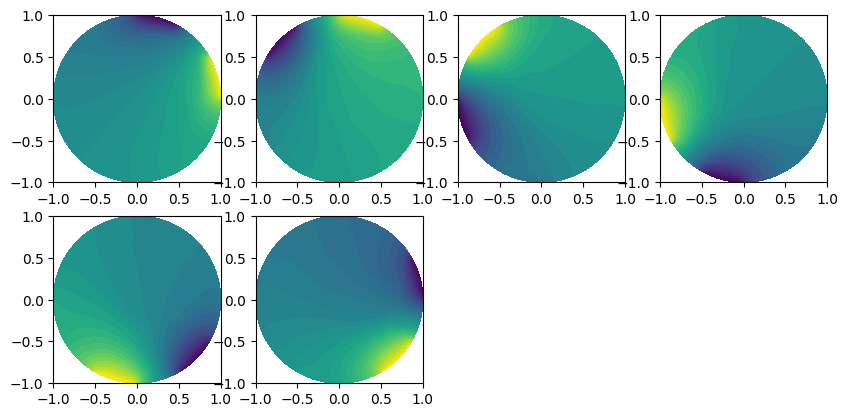

In [18]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Method 3

In [19]:
#Solver
I_all=current_method(L,l, method=3)             #Current pattern
list_u0, list_U0 = ForwardObject.solve_forward(VD, I_all, gamma0)

In [20]:
np.set_printoptions(precision=5)
print(np.array(I_all))

[[ 1.  -0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.2  1.  -0.2 -0.2 -0.2 -0.2]
 [-0.2 -0.2  1.  -0.2 -0.2 -0.2]
 [-0.2 -0.2 -0.2  1.  -0.2 -0.2]
 [-0.2 -0.2 -0.2 -0.2  1.  -0.2]
 [-0.2 -0.2 -0.2 -0.2 -0.2  1. ]]


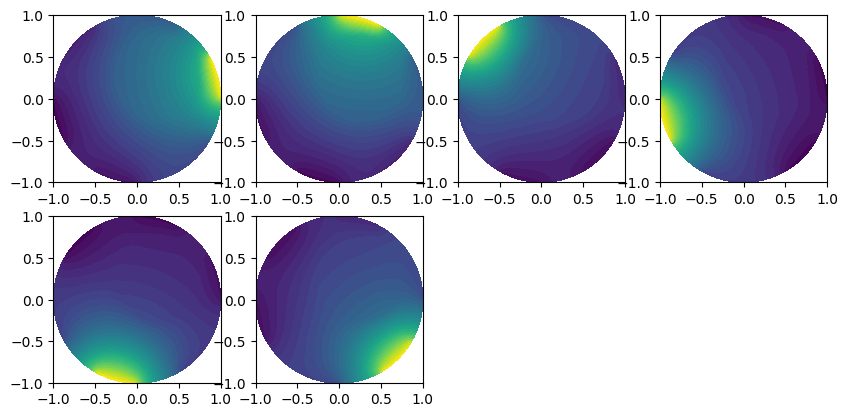

In [21]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Method 4

In [22]:
#Solver
I_all=current_method(L,l, method=4)             #Current pattern
list_u0, list_U0 = ForwardObject.solve_forward(VD, I_all, gamma0)

In [23]:
np.set_printoptions(precision=1)
print(np.array(I_all))

[[ 8.7e-01  8.7e-01  1.2e-16 -8.7e-01 -8.7e-01 -2.4e-16]
 [ 8.7e-01 -8.7e-01 -2.4e-16  8.7e-01 -8.7e-01 -4.9e-16]
 [ 1.2e-16 -2.4e-16  3.7e-16 -4.9e-16  2.4e-15 -7.3e-16]
 [-8.7e-01  8.7e-01 -4.9e-16 -8.7e-01  8.7e-01 -9.8e-16]
 [-8.7e-01 -8.7e-01  2.4e-15  8.7e-01  8.7e-01 -4.8e-15]
 [-2.4e-16 -4.9e-16 -7.3e-16 -9.8e-16 -4.8e-15 -1.5e-15]]


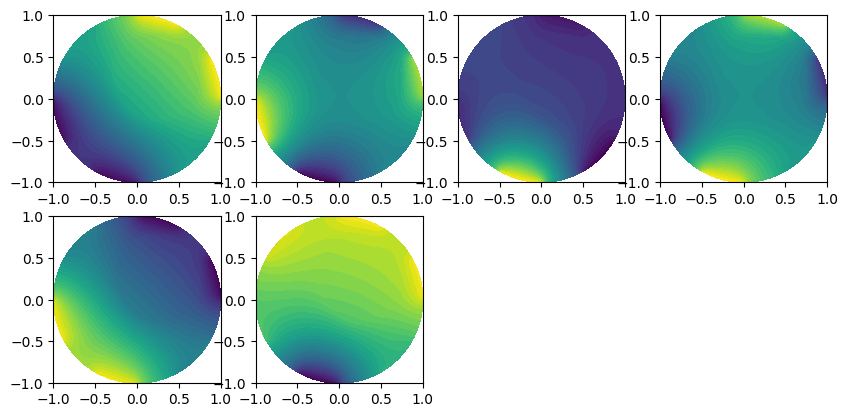

In [24]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Setting Diffent Values

In [25]:
I_all=current_method(L,l, method=2, value=1.337)
np.set_printoptions(precision=4)
print(np.array(I_all))

[[ 1.337 -1.337  0.     0.     0.     0.   ]
 [ 0.     1.337 -1.337  0.     0.     0.   ]
 [ 0.     0.     1.337 -1.337  0.     0.   ]
 [ 0.     0.     0.     1.337 -1.337  0.   ]
 [ 0.     0.     0.     0.     1.337 -1.337]
 [-1.337  0.     0.     0.     0.     1.337]]


In [26]:
I_all=current_method(L,l, method=3, value=1.337)
np.set_printoptions(precision=4)
print(np.array(I_all))

[[ 1.337  -0.2674 -0.2674 -0.2674 -0.2674 -0.2674]
 [-0.2674  1.337  -0.2674 -0.2674 -0.2674 -0.2674]
 [-0.2674 -0.2674  1.337  -0.2674 -0.2674 -0.2674]
 [-0.2674 -0.2674 -0.2674  1.337  -0.2674 -0.2674]
 [-0.2674 -0.2674 -0.2674 -0.2674  1.337  -0.2674]
 [-0.2674 -0.2674 -0.2674 -0.2674 -0.2674  1.337 ]]


### My Current

In [28]:
I_all= [ [5, -3, -1, 1, -2, 0],
         [1, 1, -1, -1, 0, 0],
         [8.5, 0, -3.5,0 ,0, -3]]
l=len(I_all)

list_u0, list_U0 = ForwardObject.solve_forward(VD, I_all, gamma0)

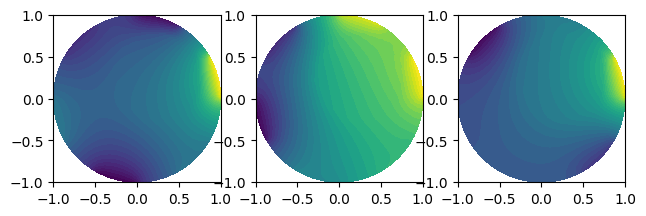

In [29]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])